# Ödev-2 Rapor

## a- Veri Analizi
### Bu projede kullanılan veri seti, 329 kullanıcıdan alınan ses kayıtlarının MFCC analizinin sonuçlarını içermektedir. MFCC, Mel-Frequency Cepstrum Coefficients (Mel-Frekans Cepstrum Katsayıları) olarak adlandırılan bir ses tanıma tekniğidir. Bu teknik, bir ses sinyalinin frekans spektrumunu inceler ve bu incelemenin ardından elde edilen verileri bir dizi sayıya dönüştürür. Bu sayılar, sesin belirli özelliklerini temsil eder ve genellikle bir "öznitelik" olarak adlandırılır. Bu projede kullanılan veri setinde bu özniteliklerden 12 adet bulunmaktadır.

### Veri setinde toplam 6 adet sınıf bulunmaktadır, bunlar: ES, FR, GE, IT, UK, US. Ancak verisetinin kullanıldığı makalede sınıf tahmini ikili sistemde yapılmıştır. Bu sebeple bu ödevde de sonuçların doğruluğunu kıyaslayabilmek adına aynı sınıflar kullanılacaktır.

In [1]:

###### Excel dosyasında düzenleme #####
import pandas as pd
"""
# Excel dosyasını oku
df = pd.read_csv("accent-mfcc-data-1.csv")

# İlk sütunu al ve virgüllerden parçala
df = df.iloc[:,0].str.split(",", expand=True)

# Yeni sütunları dataframe'e ekle
df = pd.concat([df, df.iloc[:,1:]], axis=1)"""

# İşlemin sonucunu göster

df = pd.read_csv("accent-mfcc-data-1.csv")
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [2]:
#Her bir sınıfa ait örnek sayısı

df["language"].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

In [3]:
#Veri seti sınıflarını ikili sisteme ayarlamak

mfcc_binary = df

column = "language"

# Sütundaki "USA" olmayan satırları seçin
non_usa_rows = mfcc_binary.loc[df[column] != "US"]

# Seçilen satırlara "non-USA" yazın
mfcc_binary.loc[non_usa_rows.index, column] = "non-US"

mfcc_binary

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,non-US,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,non-US,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,non-US,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,non-US,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,non-US,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [4]:
#İkili sınıf sisteminde, her bir sınıfa ait örnek sayısı

mfcc_binary[column].value_counts()

US        165
non-US    164
Name: language, dtype: int64

In [5]:
#Veri setini ikili sisteme atayalım

df = mfcc_binary

df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,non-US,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,non-US,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,non-US,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,non-US,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,non-US,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [6]:
# Öznitelik önem sıralaması yapmak
# Öncelikle gerekli kütüphanelerin içeri aktarılması gerekir
from sklearn.ensemble import ExtraTreesClassifier

# Veri kümesi ve hedef değişken (label) dizisi
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12']]
y = df.iloc[:,0]

# Ağaç tabanlı seçici modeli oluşturma
model = ExtraTreesClassifier()

# Modeli veri kümesinde eğitme
model.fit(X, y)

# Özniteliklerin önem değerlerini hesaplama
importances = model.feature_importances_

sutun = list(df.columns[1::])
liste = list(importances)
for i in range(len(liste)):
    liste[i] = str(liste[i])

for i in range(12):
    print(sutun[i] + " = " + liste[i])

X1 = 0.10718537962866584
X2 = 0.06479019951755566
X3 = 0.0501877338182844
X4 = 0.0675140124468972
X5 = 0.08408390876682956
X6 = 0.07372612238484966
X7 = 0.06792580473633889
X8 = 0.08832673787545878
X9 = 0.11401237818225869
X10 = 0.12834471392283742
X11 = 0.07849477529192049
X12 = 0.07540823342810338


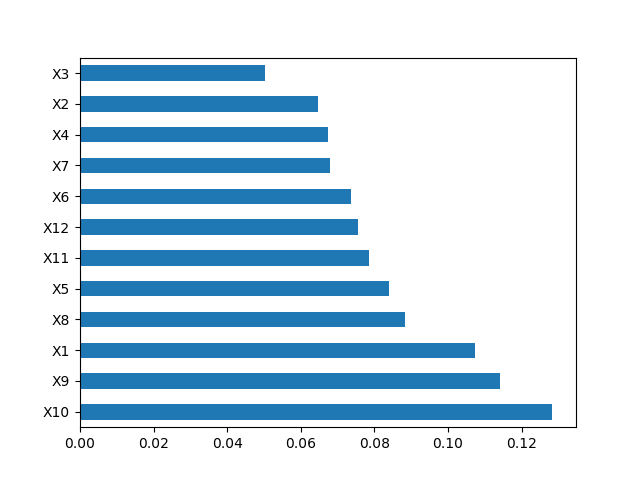

In [7]:
#Öznitelik önem sırası görselleştirme

import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Öznitelik önem sıralaması yapıldığında, veri setinde sınıflara en çok etki eden özniteliğin X10, en az etki eden özniteliğin X3 olduğu görülmektedir.

## b- Sınıflama
### Bu alanda 3 adet sınıflama yöntemi karşılaştırılacaktır. Bunlar karar ağacı, kNN ve Naive Bayes olarak seçilmiştir.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (263, 12) (263,)
Test set: (66, 12) (66,)


In [9]:
# İlk olarak karar ağacı testi
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix


decisiontree = DecisionTreeClassifier(random_state=0)
model1 = decisiontree.fit(X_train, y_train)

target_predicted=model1.predict(X_test)
print("Accuracy", model1.score(X_test, y_test))

matrix1 = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix1)

Accuracy 0.7424242424242424
Class Confusion Matrix
 [[23  9]
 [ 8 26]]


In [10]:
#İkinci olarak kNN(k en yakın komşu) testi

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

model2 = knn.fit(X_train, y_train)

target_predicted=model2.predict(X_test)
print("Accuracy", model2.score(X_test, y_test))

matrix2 = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix2)

Accuracy 0.8787878787878788
Class Confusion Matrix
 [[27  5]
 [ 3 31]]


In [11]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()

model3 = bayes.fit(X_train, y_train)

target_predicted=model3.predict(X_test)
print("Accuracy", model3.score(X_test, y_test))

matrix3 = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix3)

Accuracy 0.6363636363636364
Class Confusion Matrix
 [[10 22]
 [ 2 32]]


In [12]:
#Sınıflandırma kıyaslamaları

print("=>Karar Ağacı isabeti: ", model1.score(X_test, y_test), "\nSınıf Karışıklık Matrisi:\n", matrix1)
print("=>kNN isabeti: ", model2.score(X_test, y_test),"\nSınıf Karışıklık Matrisi:\n", matrix2)
print("=>Naive-Bayes isabeti: ", model3.score(X_test, y_test), "\nSınıf Karışıklık Matrisi:\n", matrix3)

=>Karar Ağacı isabeti:  0.7424242424242424 
Sınıf Karışıklık Matrisi:
 [[23  9]
 [ 8 26]]
=>kNN isabeti:  0.8787878787878788 
Sınıf Karışıklık Matrisi:
 [[27  5]
 [ 3 31]]
=>Naive-Bayes isabeti:  0.6363636363636364 
Sınıf Karışıklık Matrisi:
 [[10 22]
 [ 2 32]]


### Alınan başarım oranlarına göre en başarılı sınıflandırma modeli, %87 başarı ile kNN modeli olmuştur.

## c- Kümeleme

### Bu kısımda veri setine 3 adet kümele işlemi yapılmıştır.

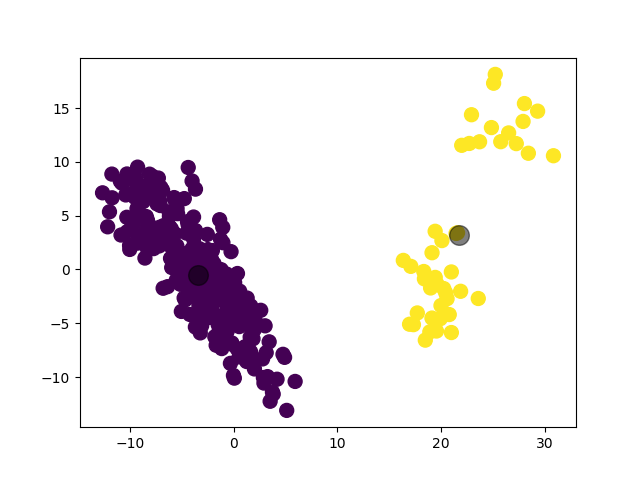

Silhouette skoru:  0.7046220134530904


In [13]:
#k-means kümeleme 

from sklearn.cluster import KMeans

#Önce veri setini PCA(Temel Bileşen Analizi) ile 2 boyutlu hale indirgiyoruz

from sklearn.decomposition import PCA

pca = PCA(2)

X_yeni = pca.fit_transform(X)
X_yeni = pd.DataFrame(X_yeni)

# K-means modelini oluştur
kmeans = KMeans(n_clusters=2)

# Modeli eğit
kmeans.fit(X_yeni)

# Kümelere ait etiketleri tahmin et
labels = kmeans.predict(X_yeni)

# Görselleştir
plt.scatter(X_yeni[0], X_yeni[1], c=labels, s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

# Silhouette skoru hesapla
from sklearn import metrics

silhouette_score = metrics.silhouette_score(X_yeni, labels, metric='euclidean')
print("Silhouette skoru: ", silhouette_score)

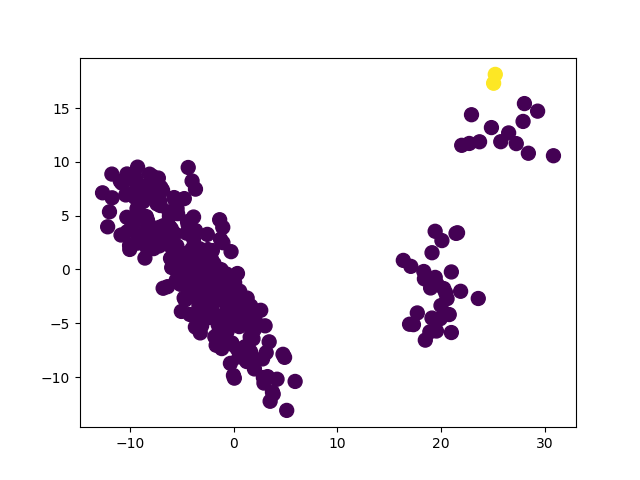

Silhouette score: 0.5805352888611659


In [14]:
#Spektral Kümeleme
from sklearn.cluster import SpectralClustering
import numpy as np

#Veri setini array tipine dönüştür
X_yeni = np.array(X_yeni)

# SpectralCluster modelini oluştur
spectral = SpectralClustering(n_clusters=2)
spectral.fit(X_yeni)

# Görselleştir
plt.scatter(X_yeni[:, 0], X_yeni[:, 1], c=spectral.labels_,s=100, cmap='viridis')
plt.show()

# Silhouette skoru hesapla
score = metrics.silhouette_score(X_yeni, spectral.labels_ , metric='euclidean')
print("Silhouette score:", score)

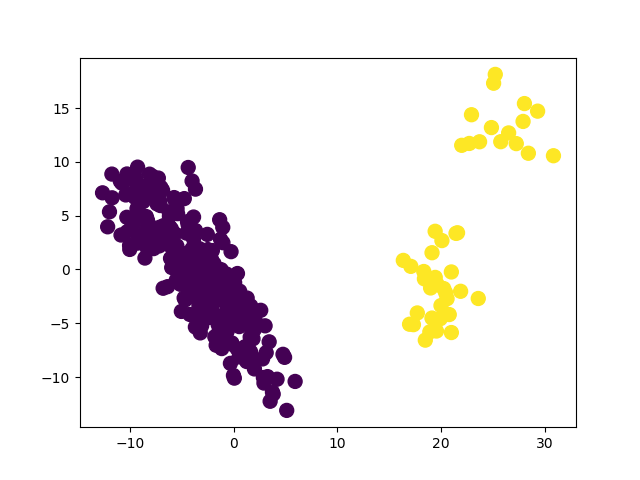

Silhouette score: 0.6820223979969533


In [15]:
#Agglomerative Kümeleme
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering modeli oluştur
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_yeni)

# Görselleştir
plt.scatter(X_yeni[:, 0], X_yeni[:, 1], c=agg.labels_, s=100, cmap='viridis')
plt.show()

# Silhouette skoru hesapla
score = metrics.silhouette_score(X_yeni, agg.labels_, metric = "manhattan")
print("Silhouette score:", score)

### 3 farklı kümeleme modelleri içerisinde Silhouette skoru en yüksek olan mode k-means modeli olmuştur.

------------------------------------------------------------------------------------------------------------------------

# Emrah MÜLAZIMOĞLU
# 225B5009